# Evaluate Exercises

__Step 1__

Load the tips dataset from either pydataset or seaborn.

In [1]:
import numpy as np
import pandas as pd
from pydataset import data

In [2]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


__Step 2__

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip, using total_bill.

In [3]:
#Split data into X and y groups
X = tips.total_bill
y = tips.tip

In [4]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(tips[['total_bill']], y)
predictions = model.predict(tips[['total_bill']])
tips['yhat'] = predictions
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


__Step 3__

Plot the residuals for the linear regression model that you made.

In [5]:
#Calculate residuals: actual - predicted
tips['residuals'] = tips.tip - tips.yhat
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

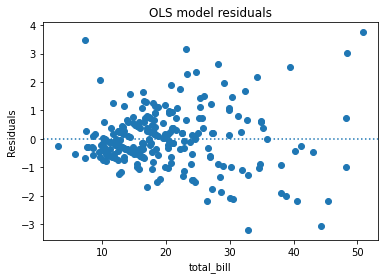

In [7]:
plt.scatter(tips.total_bill, tips.residuals)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residuals')
plt.title('OLS model residuals')
plt.show()

__Step 4__

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [8]:
#Square the residuals
tips['residuals^2'] = tips.residuals ** 2

In [9]:
SSE = tips['residuals^2'].sum()
SSE

252.788743850776

In [10]:
#ESS is the difference between the mean value and predicted value
tips['explained_difference^2'] = (tips.yhat - tips.tip.mean())**2
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals,residuals^2,explained_difference^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.871792,0.086226
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,0.119870,0.984174
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,0.139252,0.016527
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250,0.009458,0.167258
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178,0.011487,0.254564


In [11]:
#ESS is the sum of 'explained_difference^2'
ESS = tips['explained_difference^2'].sum()
ESS

212.4237331984042

In [12]:
#TSS is equal to ESS + SSE
TSS = ESS + SSE
TSS

465.21247704918017

In [13]:
#MSE is SSE / num of observations (The average error)
MSE = SSE / len(tips)
MSE

1.036019442011377

In [14]:
#RMSE is sqrt of MSE
from math import sqrt

In [15]:
RMSE = sqrt(MSE)
RMSE

1.0178504025697377

In [16]:
print(f'SSE = {SSE}')
print(f'ESS = {ESS}')
print(f'TSS = {TSS}')
print(f'MSE = {MSE}')
print(f'RMSE = {RMSE}')

SSE = 252.788743850776
ESS = 212.4237331984042
TSS = 465.21247704918017
MSE = 1.036019442011377
RMSE = 1.0178504025697377


__Step 5__

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [17]:
tips['baseline'] = tips.tip.mean()

In [18]:
#SSE is the sum of squared residuals
tips['baseline_residuals'] = tips.tip - tips.baseline

In [19]:
tips['baseline_residuals^2'] = tips.baseline_residuals ** 2

In [20]:
baseline_SSE = tips['baseline_residuals^2'].sum()
baseline_SSE

465.21247704918045

In [21]:
#MSE is the average of SSE
baseline_MSE = baseline_SSE / len(tips)
baseline_MSE

1.9066085124966412

In [22]:
#RMSE is the sqrt of MSE
baseline_RMSE = sqrt(baseline_MSE)
baseline_RMSE

1.3807999538298954

In [23]:
print(f'Baseline SSE = {baseline_SSE}')
print(f'Baseline MSE = {baseline_MSE}')
print(f'Baseline RMSE = {baseline_RMSE}')

Baseline SSE = 465.21247704918045
Baseline MSE = 1.9066085124966412
Baseline RMSE = 1.3807999538298954


__Step 6__

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [37]:
if RMSE < baseline_RMSE:
    print('Model performs better than baseline.')
else:
    print('Baseline performs better than model.')

Model performs better than baseline.


__Step 7__

What is the amount of variance explained in your model?

In [25]:
#Explained variance is the same as the r^2 score.
#r^2 = ESS / TSS
R2 = ESS / TSS
R2

0.4566165863516763

__Step 8__

Is your model better than the baseline model?

Yes, my model is better than the baseline model. See step 6.

__Step 9__

Create a file named evaluate.py that contains the following functions:

* plot_residuals(y, yhat): creates a residual plot

* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)

* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [27]:
#plot_residuals(y,yhat)
def plot_residuals(X,y,yhat):
    #Calculate residuals
    residuals = y - yhat
    
    #plot residuals
    plt.scatter(X, residuals)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('X')
    plt.ylabel('Residuals')
    plt.title('OLS model residuals')
    plt.show()


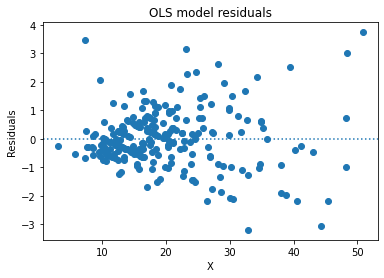

In [28]:
plot_residuals(tips.total_bill, tips.tip, tips.yhat)

In [33]:
#regression errors: SSE, ESS, TSS, MSE, RMSE
def regression_errors(y, yhat):
    #Calculate SSE: sum of squared residuals
    residuals = y - yhat
    SSE = (residuals**2).sum()
    
    #Calculate ESS: difference between mean and yhat
    ESS = ( (yhat - y.mean()) ** 2).sum()
    
    #Calculate TSS: SSE + ESS
    TSS = SSE + ESS
    
    #Calculate MSE: SSE / observations
    MSE = SSE / len(y)
    
    #Calculate RMSE: sqrt of MSE
    RMSE = sqrt(MSE)
    
    return SSE, ESS, TSS, MSE, RMSE

In [34]:
regression_errors(tips.tip, tips.yhat)

(252.788743850776,
 212.4237331984042,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

In [35]:
#Baseline mean errors: SSE, MSE, RMSE
def baseline_mean_errors(y):
    #Calculate SSE: sum of squared residuals
    SSE = ( (y - y.mean()) ** 2).sum()
    
    #Calculate MSE: SSE / observations
    MSE = SSE / len(y)
    
    #Calculate RMSE: sqrt of MSE
    RMSE = sqrt(MSE)
    
    return SSE, MSE, RMSE

In [36]:
baseline_mean_errors(tips.tip)

(465.21247704918045, 1.9066085124966412, 1.3807999538298954)

In [40]:
#Better than baseline
def better_than_baseline(y, yhat):
    #Get baseline mean errors
    baseline_SSE, baseline_MSE, baseline_RMSE = baseline_mean_errors(y)
    
    #Get model regression errors
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    #I will judge based on RMSE since that is most common method
    if RMSE < baseline_RMSE:
        return True
    else:
        return False

In [41]:
better_than_baseline(tips.tip, tips.yhat)

True

__Step 10__

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [42]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [44]:
#Create model
model = LinearRegression()

#Fit the model
model.fit(mpg[['displ']], mpg.hwy)

#Make predictions
predictions = model.predict(mpg[['displ']])

In [45]:
import evaluate

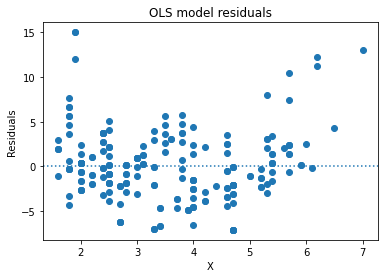

In [46]:
#Show residuals
evaluate.plot_residuals(mpg.displ, mpg.hwy, predictions)

In [47]:
#Get model regression errors
regression_errors(mpg.hwy, predictions)

(3413.829008995467,
 4847.833384166924,
 8261.66239316239,
 14.589012858954987,
 3.8195566312014524)

In [48]:
#Get baseline mean errors
baseline_mean_errors(mpg.hwy)

(8261.66239316239, 35.30624954342902, 5.941906221359356)

In [50]:
#Is my model better than baseline?
if better_than_baseline(mpg.hwy, predictions):
    print('Based on RMSE, my model is better than baseline.')
else:
    print('Based on RMSE, the baseline is better than my model.')

Based on RMSE, my model is better than baseline.
